In [1]:
import math
import numpy as np
import matplotlib.pylab as plt
np.set_printoptions(precision=2)
import scipy.io as sio

Načtení dat

In [2]:
X = sio.loadmat("../dataCustom.mat")["X"]
y = sio.loadmat("../dataCustom.mat")["y"]
beta_true = sio.loadmat("../dataCustom.mat")["beta_true"]

Hledání parametrů

In [3]:
# Import modelu z ModelsCollection
import sys
sys.path.append('..')
from ModelsCollection import sparseBayesRegression

Vykreslení

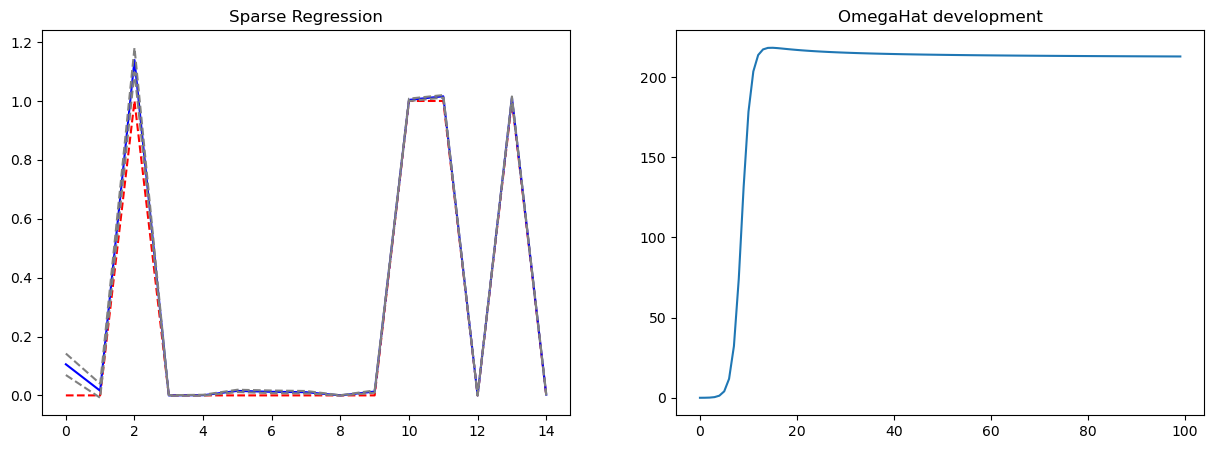

In [4]:
betaHat,sigmaBeta, hist_omega = sparseBayesRegression(X,y,iterCount=101)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("Sparse Regression")


axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()